In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix

1. โหลด csv เข้าไปใน Python Pandas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/TawanTan/Wine_dataset/master/datasets_308180_627001_Wine.csv')

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [4]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


In [5]:
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,1
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695,3
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,2
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,2
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,3
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,2
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,1
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,1
18,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680,1


3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [10]:
df.drop('Customer_Segment',axis=1).describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

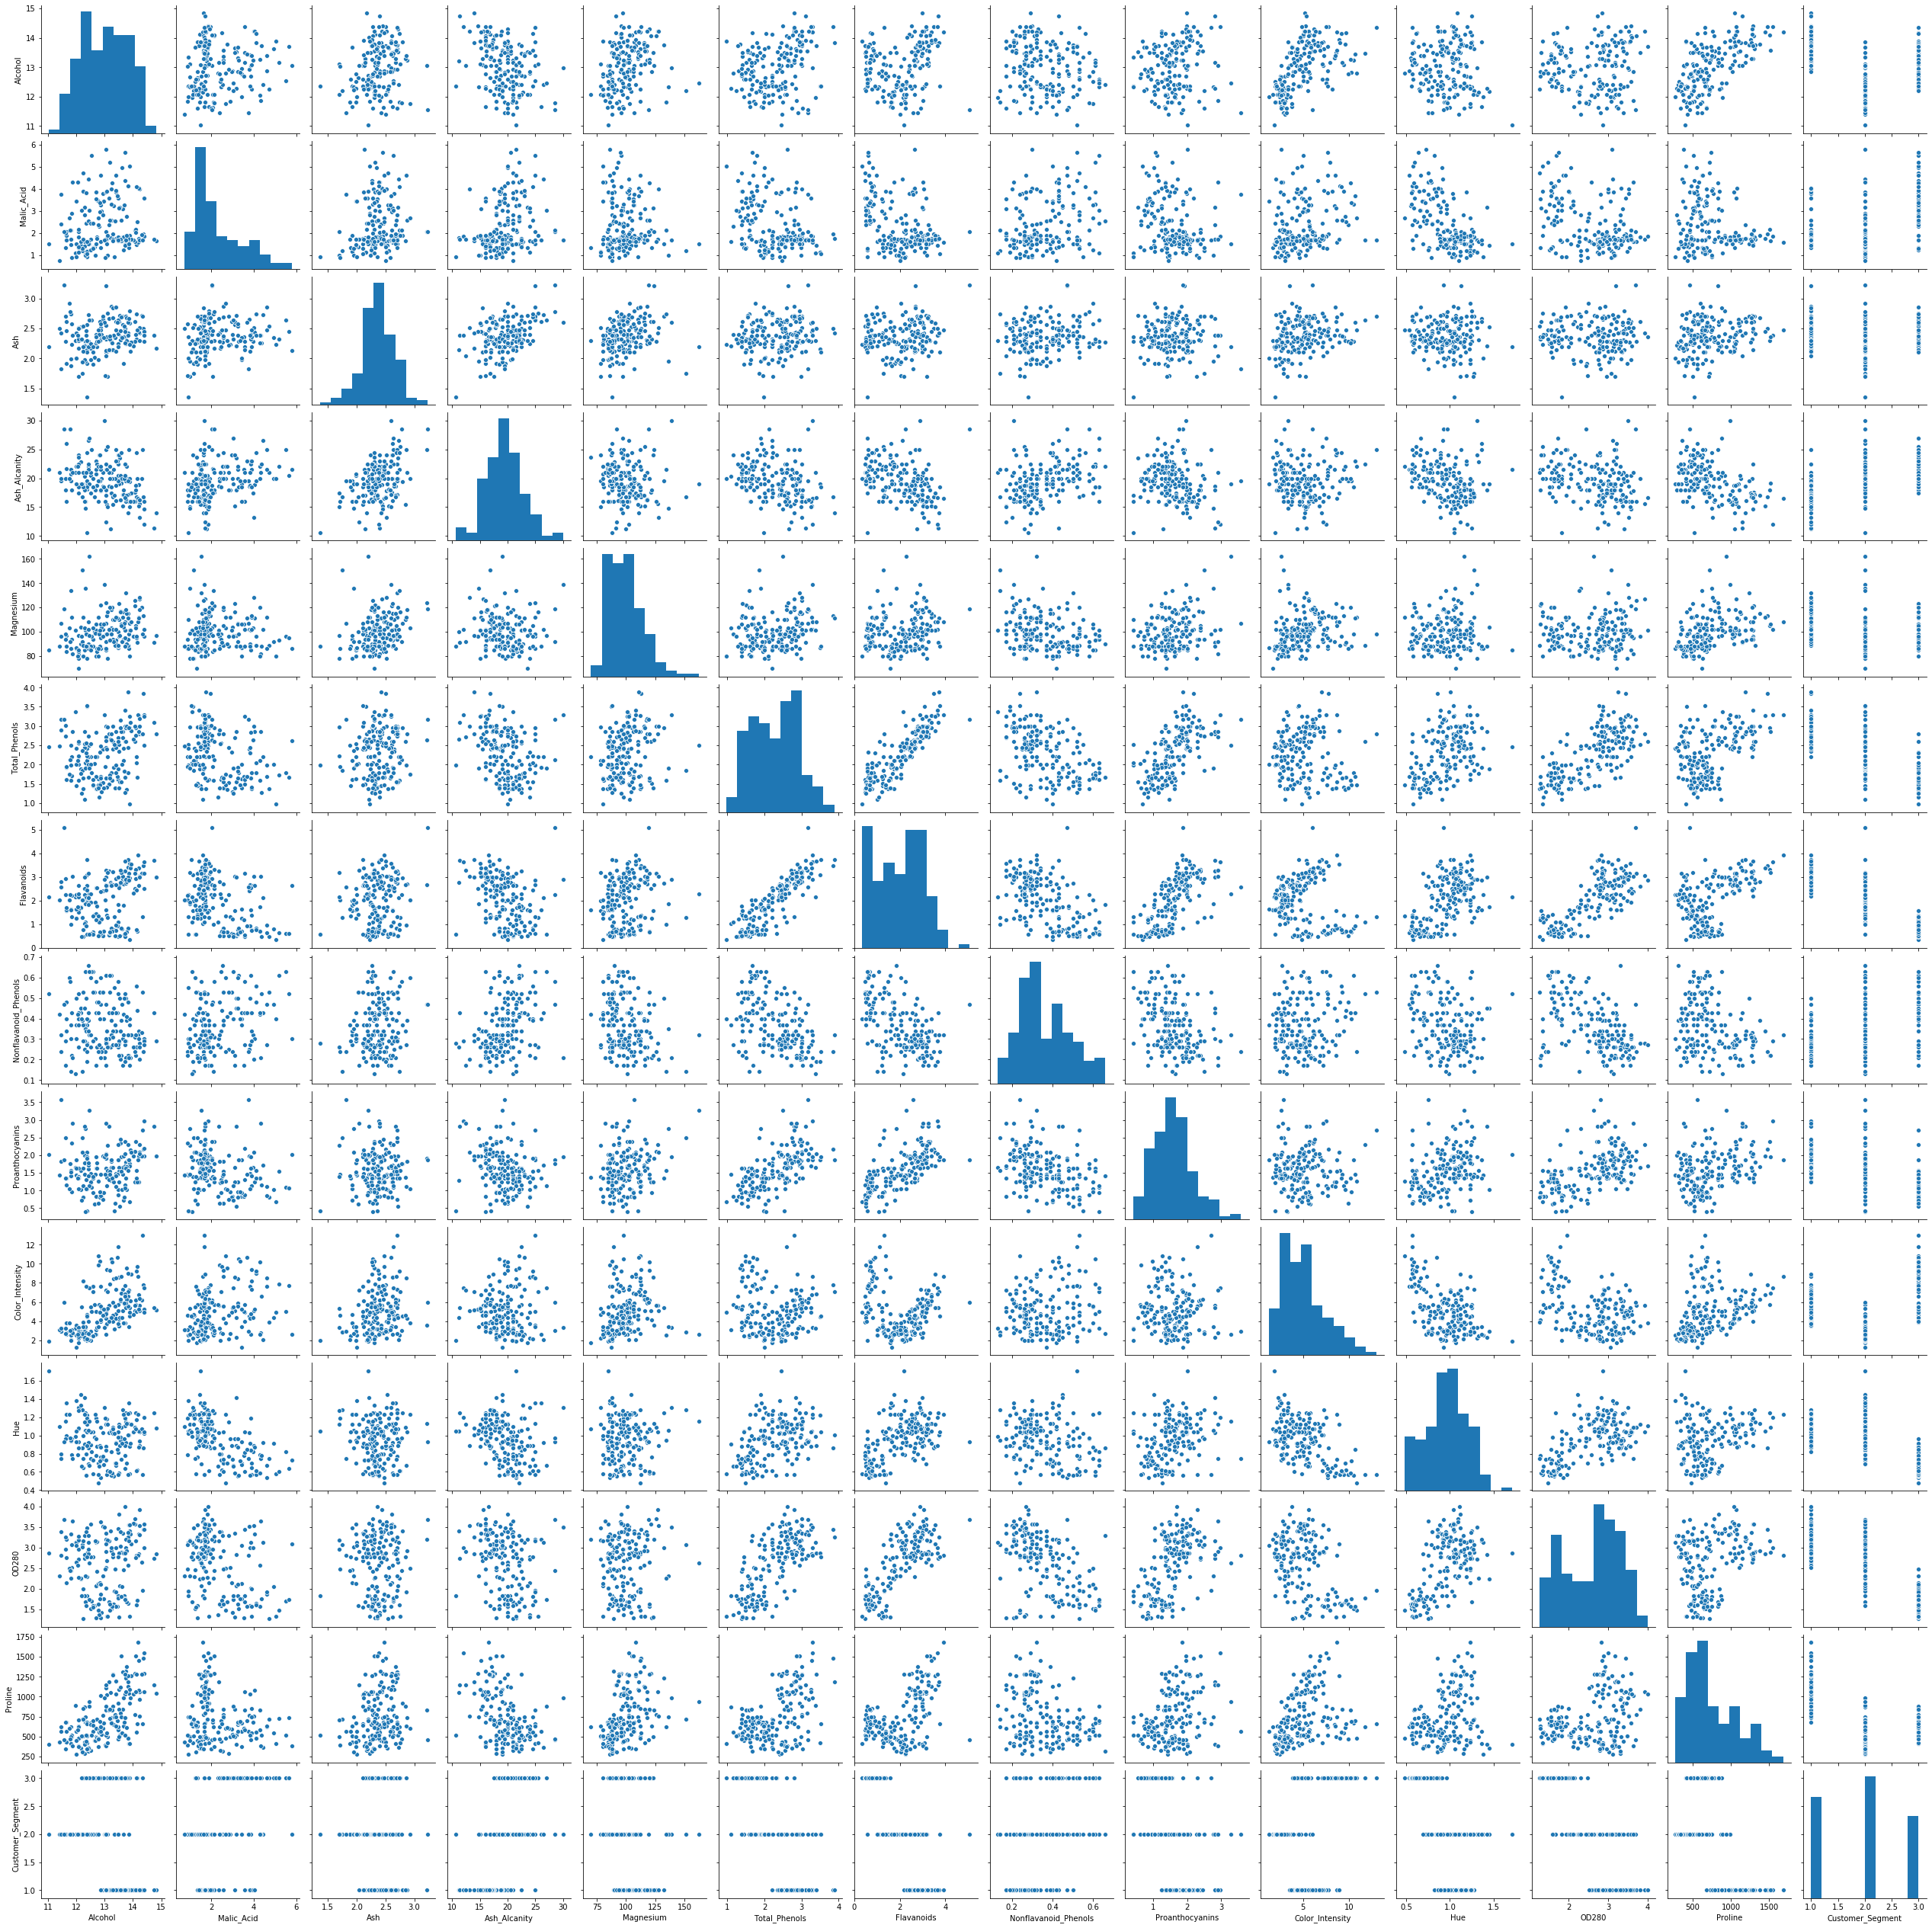

In [11]:
sns.pairplot(df)

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

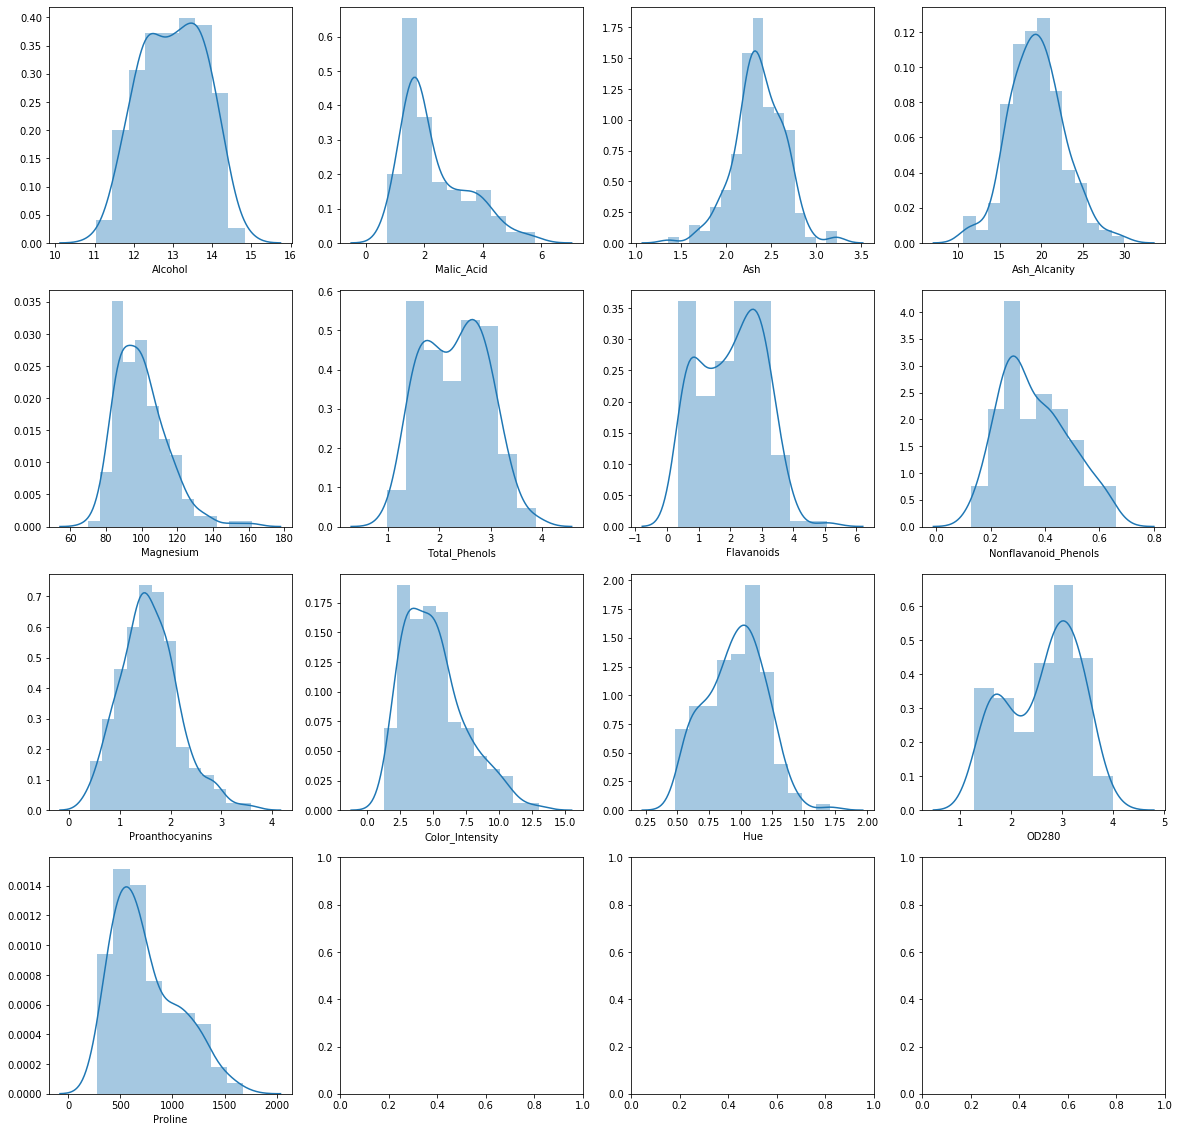

In [19]:
f, axes = plt.subplots(4, 4, figsize=(20,20))
axes=axes.ravel()
for i,j in enumerate(df.drop('Customer_Segment', axis=1)):
    plot=sns.distplot(df[j], ax=axes[i])


7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

10. สร้าง histogram ของ feature เพื่อดูการกระจายตัวของข้อมูล


11. สร้าง boxplot เพื่อเช็ค outliers ของแต่ละฟีเจอร์

12. จัดการกับ Outliers ได้ตามความเหมาะสม

13. สร้าง train/test split ของข้อมูล ด้วย 70:30 ratio 

14. ทำ Standardization ให้ X_train, X_test

15. เลือกชนิดของ Baseline โมเดล 3 ชนิด 
(ซ้ำกับ PCA 2 ชนิด และ อันใหม่ 1 ชนิด)


16. เทรนโมเดลทั้ง 3 ชนิด

17. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)

18. ทำ hyperparameter tuning ด้วย GridSearchCV

19. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)

20. ทำ LDA โดยกำหนดให้มี output = 2 components


21. ทำ Clustering Visualization ของ Features ต่อผลลัพธ์ทั้ง 3 Classes

22. เทรนโมเดลทั้ง 3 ชนิดกับข้อมูล LDA

23. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)


24. ทำ Hyperparameter tuning ด้วย GridSearchCV กับโมเดลใหม่

25. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)

26. ทำ Data Visualization ค่า Acc ของทุกโมเดลที่ทำมาด้วย plotly


27. ทำ Data Visualization ค่า F1 Score ของทุกโมเดลที่ทำมา 
ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


28.ทำ Data Visualization ค่า Precision ของทุกโมเดลที่ทำมา
ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


29. ทำ Data Visualization ค่า Recall ของทุกโมเดลที่ทำมา
ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


30. ทำ Data Visualization ค่า Accuracy, F1 Score, Precision, Recall ของโมเดล 2 ชนิดที่ทำ PCA และ LDA เพื่อเปรียบเทียบค่า 
แบบก่อนทำ Hyperparameter tuning

31. ทำ Data Visualization ค่า Accuracy, F1 Score, Precision, Recall ของโมเดล 2 ชนิดที่ทำ PCA และ LDA เพื่อเปรียบเทียบค่า 
แบบหลังทำ Hyperparameter tuning

